In [412]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [413]:
df = pd.read_csv(filepath_or_buffer="data/avalanches.csv")
df

RegID  RegionID     RegionName  RegionTypeId RegionTypeName  \
0           0      3001   Svalbard øst            20              B   
1           0      3001   Svalbard øst            20              B   
2           0      3001   Svalbard øst            20              B   
3           0      3001   Svalbard øst            20              B   
4           0      3001   Svalbard øst            20              B   
...       ...       ...            ...           ...            ...   
33598  281883      3035  Vest-Telemark            10              A   
33599  282018      3035  Vest-Telemark            10              A   
33600  282141      3035  Vest-Telemark            10              A   
33601  282256      3035  Vest-Telemark            10              A   
33602  282373      3035  Vest-Telemark            10              A   

       DangerLevel            ValidFrom              ValidTo  \
0                0  2018-01-01T00:00:00  2018-01-01T23:59:59   
1                0  2018-01-02T00:00:00  2018-01-02T23:59:59   
2                0  2018-01-03T00:00:00  2018-01-03T23:59:59   
3                0  2018-01-04T00:00:00  2018-01-04T23:59:59   
4                0  2018-01-05T00:00:00  2018-01-05T23:59:59   
...            ...                  ...                  ...   
33598            1  2021-12-27T00:00:00  2021-12-27T23:59:59   
33599            1  2021-12-28T00:00:00  2021-12-28T23:59:59   
33600            1  2021-12-29T00:00:00  2021-12-29T23:59:59   
33601            2  2021-12-30T00:00:00  2021-12-30T23:59:59   
33602            2  2021-12-31T00:00:00  2021-12-31T23:59:59   

           NextWarningTime              PublishTime  DangerIncreaseTime  \
0      2018-01-01T17:00:00      2018-01-01T00:00:00                 NaN   
1      2018-01-01T17:00:00      2018-01-02T00:00:00                 NaN   
2      2018-01-03T17:00:00      2018-01-03T00:00:00                 NaN   
3      2018-01-03T17:00:00      2018-01-04T00:00:00                 NaN   
4      2018-01-05T17:00:00      2018-01-05T00:00:00                 NaN   
...                    ...                      ...                 ...   
33598  2021-12-28T16:00:00  2021-12-26T15:28:18.613                 NaN   
33599  2021-12-29T16:00:00  2021-12-27T15:28:08.153                 NaN   
33600  2021-12-30T16:00:00   2021-12-28T15:32:18.54                 NaN   
33601  2021-12-31T16:00:00  2021-12-29T15:27:27.127                 NaN   
33602  2022-01-01T16:00:00  2021-12-30T15:37:03.963                 NaN   

       NoName                                           MainText  LangKey  
0         NaN                                       Ikke vurdert        1  
1         NaN                                       Ikke vurdert        1  
2         NaN                                       Ikke vurdert        1  
3         NaN                                       Ikke vurdert        1  
4         NaN                                       Ikke vurdert        1  
...       ...                                                ...      ...  
33598     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33599     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33600     NaN  Lite snø og generelt stabile forhold, kun muli...        1  
33601     NaN  Mildvær og regn gir fare for natulig utløste v...        1  
33602     NaN  Mildvær og regn gir fare for natulig utløste v...        1  

[33603 rows x 14 columns]

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegID               33603 non-null  int64  
 1   RegionID            33603 non-null  int64  
 2   RegionName          33603 non-null  object 
 3   RegionTypeId        33603 non-null  int64  
 4   RegionTypeName      33603 non-null  object 
 5   DangerLevel         33603 non-null  int64  
 6   ValidFrom           33603 non-null  object 
 7   ValidTo             33603 non-null  object 
 8   NextWarningTime     33603 non-null  object 
 9   PublishTime         33603 non-null  object 
 10  DangerIncreaseTime  0 non-null      float64
 11  NoName              0 non-null      float64
 12  MainText            33543 non-null  object 
 13  LangKey             33603 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 3.6+ MB


As we can see, There are very few entries with null values. We will remove columns where no values are present

In [415]:
df = df.drop(columns=["DangerIncreaseTime", "NoName"])

We are not going to use the MainText in the analysis, and we do not need the name of regions. Same with date (except when the observation is form):

In [416]:
df = df.drop(columns=["RegionName", "MainText", "ValidFrom", "ValidTo", "NextWarningTime", "LangKey", "RegionTypeName"])
df

RegID  RegionID  RegionTypeId  DangerLevel              PublishTime
0           0      3001            20            0      2018-01-01T00:00:00
1           0      3001            20            0      2018-01-02T00:00:00
2           0      3001            20            0      2018-01-03T00:00:00
3           0      3001            20            0      2018-01-04T00:00:00
4           0      3001            20            0      2018-01-05T00:00:00
...       ...       ...           ...          ...                      ...
33598  281883      3035            10            1  2021-12-26T15:28:18.613
33599  282018      3035            10            1  2021-12-27T15:28:08.153
33600  282141      3035            10            1   2021-12-28T15:32:18.54
33601  282256      3035            10            2  2021-12-29T15:27:27.127
33602  282373      3035            10            2  2021-12-30T15:37:03.963

[33603 rows x 5 columns]

Check if all the columns has the correct datatypes:

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RegID         33603 non-null  int64 
 1   RegionID      33603 non-null  int64 
 2   RegionTypeId  33603 non-null  int64 
 3   DangerLevel   33603 non-null  int64 
 4   PublishTime   33603 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [418]:
df["PublishTime"] = pd.to_datetime(df["PublishTime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RegID         33603 non-null  int64         
 1   RegionID      33603 non-null  int64         
 2   RegionTypeId  33603 non-null  int64         
 3   DangerLevel   33603 non-null  int64         
 4   PublishTime   33603 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.3 MB


## Introducing weather dataset
Based on the columns we now have, It is going to be impossible to make any sort of predition. Hence we would have to introduce the weather df_trollheimenset aswell

<Figure size 1000x600 with 0 Axes>

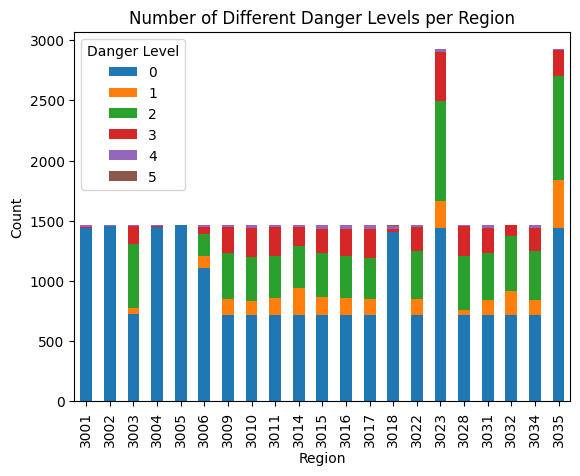

In [419]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()


Hmm, thats weird. Why does region 3023 and 3035 have much more observations than the rest?

This actually indicates that there is something wrong with these regions. After taking a closer look, there are typos in the location_data.py where several regions have the same ID. These would need to be deleted.

In addition we see 3001, 3002, 3004, 3005 and 3018 have much fewer registered observations (the ones that are observed are level 4 or 5). This indicates that these regions are not monitored as much as the other ones. These datapoints will be removed

In [420]:
# Define the region IDs to be removed
region_ids_to_remove = [3001, 3002, 3004, 3005, 3018, 3023, 3035]

# Remove rows with the specified region IDs
df = df[~df['RegionID'].isin(region_ids_to_remove)]


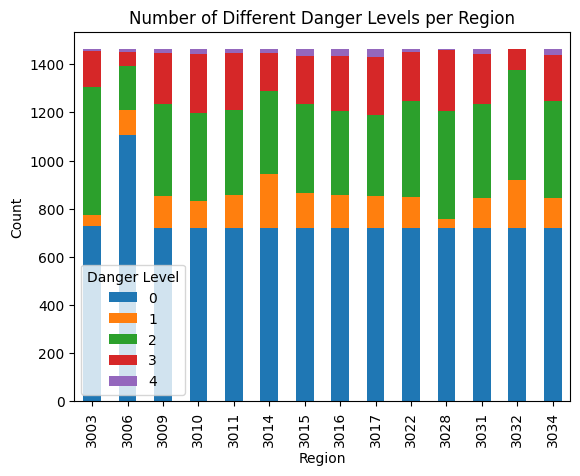

In [421]:
df.groupby('RegionID')['DangerLevel'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Different Danger Levels per Region')
plt.legend(title='Danger Level')

plt.show()

As we can see, this is much more even. It seems like these are regions which has regular updates (I suspect region 3006 was bumped up to regular updates in the middle of the dataset)

## Looking into more detail for a given region
To get more insights into how the danger level fluctuates over time, it is suitable to look into a specific region and its danger level over time. I will choose region 3022, as it equates to Trollheimen, which is where I ski the most

In [422]:
df_trollheimen = df.loc[df['RegionID'] == 3022].copy()
print(df_trollheimen)

        RegID  RegionID  RegionTypeId  DangerLevel             PublishTime
5110   137929      3022            10            2 2017-12-31 14:55:03.203
5111   138059      3022            10            2 2018-01-01 15:05:52.427
5112   138162      3022            10            2 2018-01-02 15:30:56.043
5113   138319      3022            10            2 2018-01-03 15:50:24.250
5114   138501      3022            10            2 2018-01-04 15:17:44.557
...       ...       ...           ...          ...                     ...
30678  282033      3022            10            3 2021-12-27 10:18:16.430
30679  282040      3022            10            3 2021-12-27 15:28:04.040
30680  282132      3022            10            2 2021-12-28 15:32:13.677
30681  282247      3022            10            3 2021-12-29 15:27:22.570
30682  282364      3022            10            3 2021-12-30 15:36:57.743

[1461 rows x 5 columns]


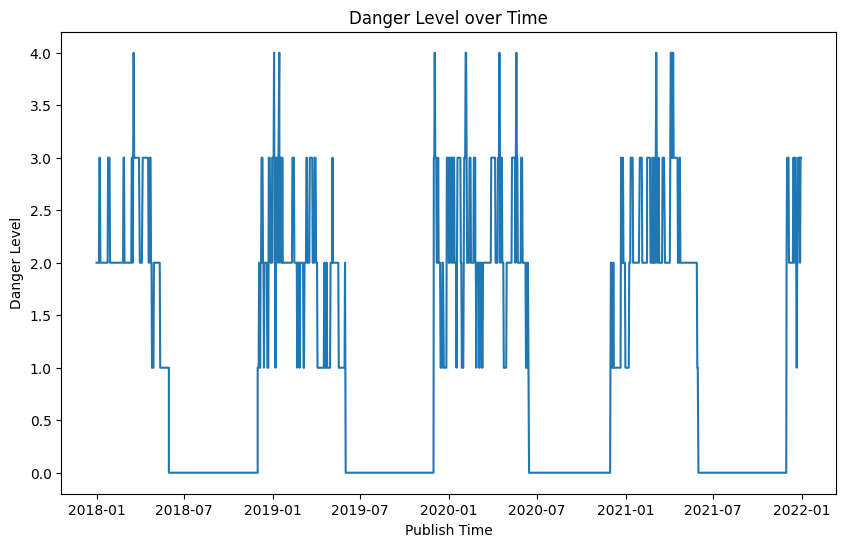

In [423]:
df_trollheimen = df_trollheimen.sort_values("PublishTime")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(df_trollheimen['PublishTime'], df_trollheimen['DangerLevel'])
plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')

plt.show()

Okay, this chart may be a bit difficult to interpret, but if we look into seasonality of the temporal data, we can see that in each summer, the DangerLevel is 0. This indicates that level 0 indicates that the region does not have a evaluation for the given time. In the wintertimes, it never hits DangerLevel 0. Now it would be interesting to look into how the DangerLevel fluctuates for a given winter season. Let's look into the 2020/2021 season:

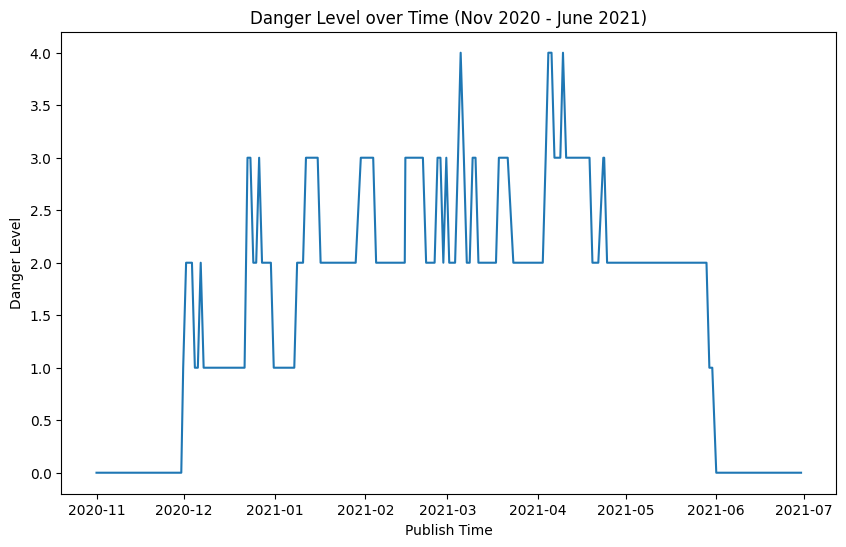

In [424]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2020-11-01')
end_date = pd.to_datetime('2021-06-30')
filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['PublishTime'], filtered_data['DangerLevel'])
plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time (Nov 2020 - June 2021)')

plt.show()

From what we can see, it seems that a general trend of danger level is that it increases thru the season and stagnates around May. This corresponds to what you might learn in litterature around avalanches. The snow early in the season is not deep enough to constitute large avalanche danger. Around mid season (think january) we will have enough snow, and it is cold enough to create presistent weak layers, which constitute super dangerous and large avalanches. Towards spring, the snow gets wetter, this results in very hard and safe snow early in the morning (because a cold night is going to harden the snowlayers). During the day in spring, the sun will make the snow wetter, this will cause the avalanche danger to rise. A wet avalanche is very dangerous

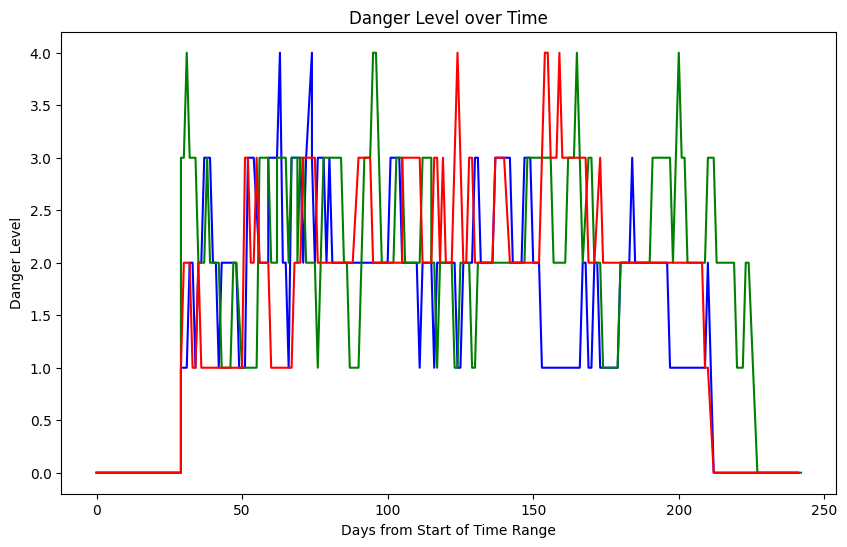

In [425]:
# Define the time ranges
time_ranges = [
    (pd.to_datetime('2018-11-01'), pd.to_datetime('2019-06-30'), 'blue'),
    (pd.to_datetime('2019-11-01'), pd.to_datetime('2020-06-30'), 'green'),
    (pd.to_datetime('2020-11-01'), pd.to_datetime('2021-06-30'), 'red')
]

plt.figure(figsize=(10, 6))

# Plot the line chart for each time range
for start_date, end_date, color in time_ranges:
    filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]
    x_values = (filtered_data['PublishTime'] - start_date).dt.days
    y_values = filtered_data['DangerLevel']
    plt.plot(x_values, y_values, color=color)

plt.xlabel('Days from Start of Time Range')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')

plt.show()

Ok, this is a bit messy to unpack. It would be nicer to get a trend for each graph and compare them

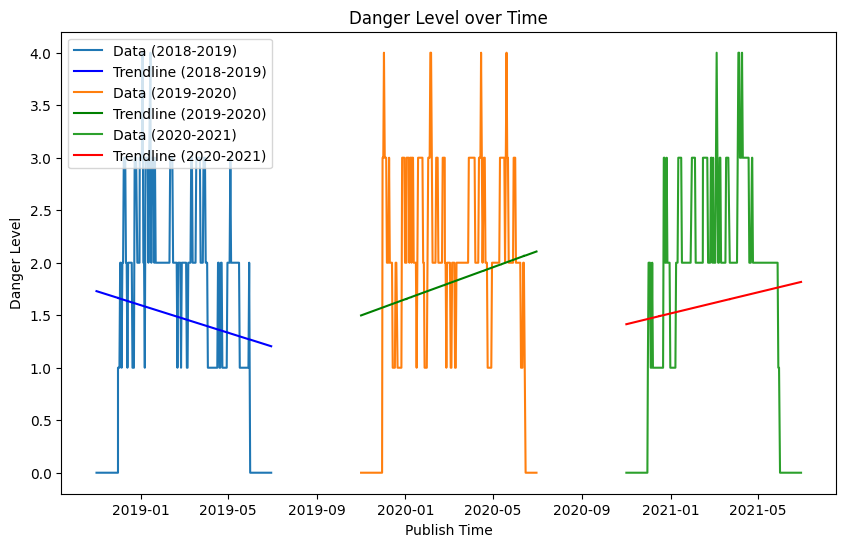

In [426]:

from scipy import stats
import numpy as np

# Define the start and end dates for each year's time range
time_ranges = [
    (pd.to_datetime('2018-11-01'), pd.to_datetime('2019-06-30'), 'blue', '2018-2019'),
    (pd.to_datetime('2019-11-01'), pd.to_datetime('2020-06-30'), 'green', '2019-2020'),
    (pd.to_datetime('2020-11-01'), pd.to_datetime('2021-06-30'), 'red', '2020-2021')
]

plt.figure(figsize=(10, 6))

# Plot the data and trendline for each time range
for start_date, end_date, color, label in time_ranges:
    filtered_data = df_trollheimen[(df_trollheimen['PublishTime'] >= start_date) & (df_trollheimen['PublishTime'] <= end_date)]

    x_days = (filtered_data['PublishTime'] - start_date).dt.days.values
    x = np.arange(len(x_days))
    y = filtered_data['DangerLevel'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    trendline = intercept + slope * x

    plt.plot(filtered_data['PublishTime'], filtered_data['DangerLevel'], label=f'Data ({label})')
    plt.plot(filtered_data['PublishTime'], trendline, label=f'Trendline ({label})', color=color)

plt.xlabel('Publish Time')
plt.ylabel('Danger Level')
plt.title('Danger Level over Time')
plt.legend()

plt.show()

As we can see, there is no specific seasonal trend the data follows. Hence we would need some more sophisticated methods for predicting avalanche danger

# Using weatherdata

In [427]:
weather_df = pd.read_csv("data/weather.csv")
weather_df.head()

latitude  longitutde  elevation        time  region_id  region_name  \
0     79.60       24.80     463.00  2018-01-01       3001  Svalbar øst   
1     79.60       24.80     463.00  2018-01-02       3001  Svalbar øst   
2     79.60       24.80     463.00  2018-01-03       3001  Svalbar øst   
3     79.60       24.80     463.00  2018-01-04       3001  Svalbar øst   
4     79.60       24.80     463.00  2018-01-05       3001  Svalbar øst   

   temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
0       -16.70       -21.60        -19.40      0.00          0.00   
1       -16.80       -22.00        -18.80      0.00          0.21   
2       -17.70       -18.50        -18.00      0.00          0.00   
3       -18.50       -23.40        -21.20      0.00          0.00   
4       -17.00       -20.60        -18.70      0.00          0.00   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  
0               6.30              15.80                          95  
1              27.00              39.60                         355  
2              28.50              41.40                           4  
3              13.60              27.40                           5  
4              22.90              34.20                          35

In [428]:
weather_df["time"] = pd.to_datetime(weather_df["time"]).dt.date
weather_df.head()

latitude  longitutde  elevation        time  region_id  region_name  \
0     79.60       24.80     463.00  2018-01-01       3001  Svalbar øst   
1     79.60       24.80     463.00  2018-01-02       3001  Svalbar øst   
2     79.60       24.80     463.00  2018-01-03       3001  Svalbar øst   
3     79.60       24.80     463.00  2018-01-04       3001  Svalbar øst   
4     79.60       24.80     463.00  2018-01-05       3001  Svalbar øst   

   temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
0       -16.70       -21.60        -19.40      0.00          0.00   
1       -16.80       -22.00        -18.80      0.00          0.21   
2       -17.70       -18.50        -18.00      0.00          0.00   
3       -18.50       -23.40        -21.20      0.00          0.00   
4       -17.00       -20.60        -18.70      0.00          0.00   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  
0               6.30              15.80                          95  
1              27.00              39.60                         355  
2              28.50              41.40                           4  
3              13.60              27.40                           5  
4              22.90              34.20                          35

In [429]:
df['PublishDate'] = pd.to_datetime(df['PublishTime']).dt.date


# Perform the join operation
total_df = weather_df.merge(df, left_on='region_id', right_on='RegionID')
total_df = total_df[total_df['PublishDate'] == total_df['time']]

# Display the merged dataframe
total_df.head()


latitude  longitutde  elevation        time  region_id  \
1        78.00       15.10     542.00  2018-01-01       3003   
1463     78.00       15.10     542.00  2018-01-02       3003   
2925     78.00       15.10     542.00  2018-01-03       3003   
4387     78.00       15.10     542.00  2018-01-04       3003   
5849     78.00       15.10     542.00  2018-01-05       3003   

            region_name  temp_2m_max  temp_2m_min  temp_2m_mean  rain_sum  \
1     Nordenskiold Land       -19.30       -23.00        -21.50      0.00   
1463  Nordenskiold Land       -15.70       -20.20        -17.70      0.00   
2925  Nordenskiold Land       -16.60       -19.40        -17.40      0.00   
4387  Nordenskiold Land       -18.80       -24.10        -22.00      0.00   
5849  Nordenskiold Land       -15.30       -19.50        -18.00      0.00   

      snowfall_sum  windspeed_10m_max  windgusts_10m_max  \
1             0.00               6.90              23.80   
1463          0.00               6.00              21.20   
2925          0.00               5.80              17.60   
4387          0.21               9.40              20.90   
5849          1.75              16.40              55.40   

      winddirection_10m_dominant   RegID  RegionID  RegionTypeId  DangerLevel  \
1                             88  138048      3003            10            2   
1463                          53  138151      3003            10            2   
2925                          75  138308      3003            10            2   
4387                         101  138490      3003            10            2   
5849                          72  138640      3003            10            2   

                 PublishTime PublishDate  
1    2018-01-01 15:05:50.190  2018-01-01  
1463 2018-01-02 15:30:54.467  2018-01-02  
2925 2018-01-03 15:50:22.463  2018-01-03  
4387 2018-01-04 15:17:42.117  2018-01-04  
5849 2018-01-05 15:51:44.643  2018-01-05

Lets remove the columns we do not care about

In [430]:
total_df = total_df.drop(columns=["RegID", "RegionID", "RegionTypeId", "region_name", "PublishDate", "PublishTime"])
total_df.head()

latitude  longitutde  elevation        time  region_id  temp_2m_max  \
1        78.00       15.10     542.00  2018-01-01       3003       -19.30   
1463     78.00       15.10     542.00  2018-01-02       3003       -15.70   
2925     78.00       15.10     542.00  2018-01-03       3003       -16.60   
4387     78.00       15.10     542.00  2018-01-04       3003       -18.80   
5849     78.00       15.10     542.00  2018-01-05       3003       -15.30   

      temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  windspeed_10m_max  \
1          -23.00        -21.50      0.00          0.00               6.90   
1463       -20.20        -17.70      0.00          0.00               6.00   
2925       -19.40        -17.40      0.00          0.00               5.80   
4387       -24.10        -22.00      0.00          0.21               9.40   
5849       -19.50        -18.00      0.00          1.75              16.40   

      windgusts_10m_max  winddirection_10m_dominant  DangerLevel  
1                 23.80                          88            2  
1463              21.20                          53            2  
2925              17.60                          75            2  
4387              20.90                         101            2  
5849              55.40                          72            2

In [431]:
print(total_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20441 entries, 1 to 29881832
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   latitude                    20441 non-null  float64
 1   longitutde                  20441 non-null  float64
 2   elevation                   20441 non-null  float64
 3   time                        20441 non-null  object 
 4   region_id                   20441 non-null  int64  
 5   temp_2m_max                 20441 non-null  float64
 6   temp_2m_min                 20441 non-null  float64
 7   temp_2m_mean                20441 non-null  float64
 8   rain_sum                    20441 non-null  float64
 9   snowfall_sum                20441 non-null  float64
 10  windspeed_10m_max           20441 non-null  float64
 11  windgusts_10m_max           20441 non-null  float64
 12  winddirection_10m_dominant  20441 non-null  int64  
 13  DangerLevel                 

In [432]:
import plotly.express as px

# Select the relevant columns for correlation analysis
columns_for_correlation = ['temp_2m_max', 'temp_2m_min', 'temp_2m_mean', 'rain_sum',
                           'snowfall_sum', 'windspeed_10m_max', 'windgusts_10m_max',
                           'winddirection_10m_dominant', 'DangerLevel']

# Subset the dataframe with the selected columns
subset_df = total_df[columns_for_correlation]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create the correlation heatmap using Plotly
fig = px.imshow(corr_matrix, labels=dict(x="Features", y="Features", color="Correlation"))
fig.update_layout(title="Correlation Chart", width=800, height=600)
fig.show()

This correlation chart is deemed to be a bit bad at actual representing correlation, since the weather now is on the same day as the forecast. However there are some interesting patterns here which we will explore further:
- Negative correlation with temperature 
- Relatively high correlation with snowfall sum

We will now revisit Trollheimen to see how this actually correlates.

In [433]:
df_trollheimen = total_df.loc[total_df['region_id'] == 3022].copy()
df_trollheimen

latitude  longitutde  elevation        time  region_id  temp_2m_max  \
19210690     62.80        9.20    1024.00  2018-01-01       3022        -5.60   
19212152     62.80        9.20    1024.00  2018-01-02       3022        -5.20   
19213614     62.80        9.20    1024.00  2018-01-03       3022       -11.20   
19215076     62.80        9.20    1024.00  2018-01-04       3022        -8.90   
19216538     62.80        9.20    1024.00  2018-01-05       3022        -9.00   
...            ...         ...        ...         ...        ...          ...   
21339361     62.80        9.20    1024.00  2021-12-27       3022        -8.30   
21339362     62.80        9.20    1024.00  2021-12-27       3022        -8.30   
21340824     62.80        9.20    1024.00  2021-12-28       3022       -10.80   
21342286     62.80        9.20    1024.00  2021-12-29       3022       -11.60   
21343748     62.80        9.20    1024.00  2021-12-30       3022        -6.00   

          temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  \
19210690       -12.80        -10.50      0.00          1.05   
19212152       -12.50         -7.10      0.00          1.12   
19213614       -15.20        -13.30      0.00          0.07   
19215076       -10.90         -9.60      0.00          1.68   
19216538       -11.60        -10.10      0.00          0.35   
...               ...           ...       ...           ...   
21339361       -15.10        -12.50      0.00          0.00   
21339362       -15.10        -12.50      0.00          0.00   
21340824       -14.90        -13.30      0.00          0.00   
21342286       -15.30        -13.30      0.00          0.00   
21343748       -14.00        -10.10      0.00          0.98   

          windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
19210690               9.40              47.90                         184   
19212152               8.90              29.20                         237   
19213614               9.10              33.10                         182   
19215076               8.40              29.90                         135   
19216538               6.60              28.80                         266   
...                     ...                ...                         ...   
21339361               9.70              31.70                         203   
21339362               9.70              31.70                         203   
21340824              10.30              34.60                         205   
21342286               7.50              27.00                         214   
21343748               9.70              38.90                         218   

          DangerLevel  
19210690            2  
19212152            2  
19213614            2  
19215076            2  
19216538            2  
...               ...  
21339361            3  
21339362            3  
21340824            2  
21342286            3  
21343748            3  

[1460 rows x 14 columns]

In [434]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the dataframe for the desired time period
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2020-06-30')
filtered_df = df_trollheimen[(df_trollheimen['time'] >= start_date) & (df_trollheimen['time'] <= end_date)]

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for snowfall_sum and DangerLevel
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['snowfall_sum'], name='Snowfall Sum'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['DangerLevel'], name='Danger Level'),
              secondary_y=True)

# Set x-axis label
fig.update_xaxes(title_text='Time')

# Set y-axis labels
fig.update_yaxes(title_text='Snowfall Sum (mm)', secondary_y=False)
fig.update_yaxes(title_text='Danger Level', secondary_y=True)

# Set chart title
fig.update_layout(title='Snowfall and Danger Level (Nov 2019 - Jun 2020)')

# Show the plot
fig.show()


This shows some interesting correlations where the spikes in danger levels occurs sometims when snowfall is high in the region. Now take a look at temperature aswell

In [435]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the dataframe for the desired time period
start_date = pd.to_datetime('2019-11-01')
end_date = pd.to_datetime('2020-06-30')
filtered_df = df_trollheimen[(df_trollheimen['time'] >= start_date) & (df_trollheimen['time'] <= end_date)]

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for snowfall_sum and DangerLevel
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['temp_2m_mean'], name='Temperature mean'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=filtered_df['time'], y=filtered_df['DangerLevel'], name='Danger Level'),
              secondary_y=True)

# Set x-axis label
fig.update_xaxes(title_text='Time')

# Set y-axis labels
fig.update_yaxes(title_text='Temperature mean (Celcius)', secondary_y=False)
fig.update_yaxes(title_text='Danger Level', secondary_y=True)

# Set chart title
fig.update_layout(title='Temperature and Danger Level (Nov 2019 - Jun 2020)')

# Show the plot
fig.show()

## Dropping unintersting columns

In [436]:
total_df.head()

latitude  longitutde  elevation        time  region_id  temp_2m_max  \
1        78.00       15.10     542.00  2018-01-01       3003       -19.30   
1463     78.00       15.10     542.00  2018-01-02       3003       -15.70   
2925     78.00       15.10     542.00  2018-01-03       3003       -16.60   
4387     78.00       15.10     542.00  2018-01-04       3003       -18.80   
5849     78.00       15.10     542.00  2018-01-05       3003       -15.30   

      temp_2m_min  temp_2m_mean  rain_sum  snowfall_sum  windspeed_10m_max  \
1          -23.00        -21.50      0.00          0.00               6.90   
1463       -20.20        -17.70      0.00          0.00               6.00   
2925       -19.40        -17.40      0.00          0.00               5.80   
4387       -24.10        -22.00      0.00          0.21               9.40   
5849       -19.50        -18.00      0.00          1.75              16.40   

      windgusts_10m_max  winddirection_10m_dominant  DangerLevel  
1                 23.80                          88            2  
1463              21.20                          53            2  
2925              17.60                          75            2  
4387              20.90                         101            2  
5849              55.40                          72            2

In [437]:
total_df = total_df.drop(columns=["latitude", "longitutde", "region_id"])

Interestingly enough some of the dips in temperature results in higher danger levels. This is however not very consistent, and I would suspect that this might be an indirect correlation based on some other factor. From what I remember avalanche levels do not actually rise when there is low temperatures (actually the opposite happens, as you can see in March of 2020)

# Looking into predictions

## Splitting the data into training, testing and validation sets

In [438]:
column_indices = {name: i for i, name in enumerate(total_df.columns)}
total_df = total_df.set_index("time")
total_df = total_df.drop(columns="winddirection_10m_dominant")

n = len(total_df)
train_df = total_df[0:int(n*0.7)]
val_df = total_df[int(n*0.7):int(n*0.9)]
test_df = total_df[int(n*0.9):]

total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20441 entries, 2018-01-01 to 2021-12-30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   elevation          20441 non-null  float64
 1   temp_2m_max        20441 non-null  float64
 2   temp_2m_min        20441 non-null  float64
 3   temp_2m_mean       20441 non-null  float64
 4   rain_sum           20441 non-null  float64
 5   snowfall_sum       20441 non-null  float64
 6   windspeed_10m_max  20441 non-null  float64
 7   windgusts_10m_max  20441 non-null  float64
 8   DangerLevel        20441 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.6+ MB


## Normalizing the data
For normalizing we find the mean and set the values to be the deviation from the mean divided by the standard deviation. It is important to note that this uses only the mean of the training set, since the training set should not have access to test and validation dataset. A flaw in this approach is that the mean is calculated for future values in the training set. This is not realistic at all, and should be taken into consideration

In [439]:
# Separating the DangerLevel label from the features
train_labels = train_df["DangerLevel"]
val_labels = val_df["DangerLevel"]
test_labels = test_df["DangerLevel"]

# Drop the DangerLevel column from the feature DataFrames
train_df = train_df.drop(columns=["DangerLevel"])
val_df = val_df.drop(columns=["DangerLevel"])
test_df = test_df.drop(columns=["DangerLevel"])

# Calculate mean and standard deviation for feature normalization
train_mean = train_df.mean()
train_std = train_df.std()

# Normalize only the features, not the labels
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

# Concatenate the DangerLevel label back to the DataFrames
train_df["DangerLevel"] = train_labels
val_df["DangerLevel"] = val_labels
test_df["DangerLevel"] = test_labels


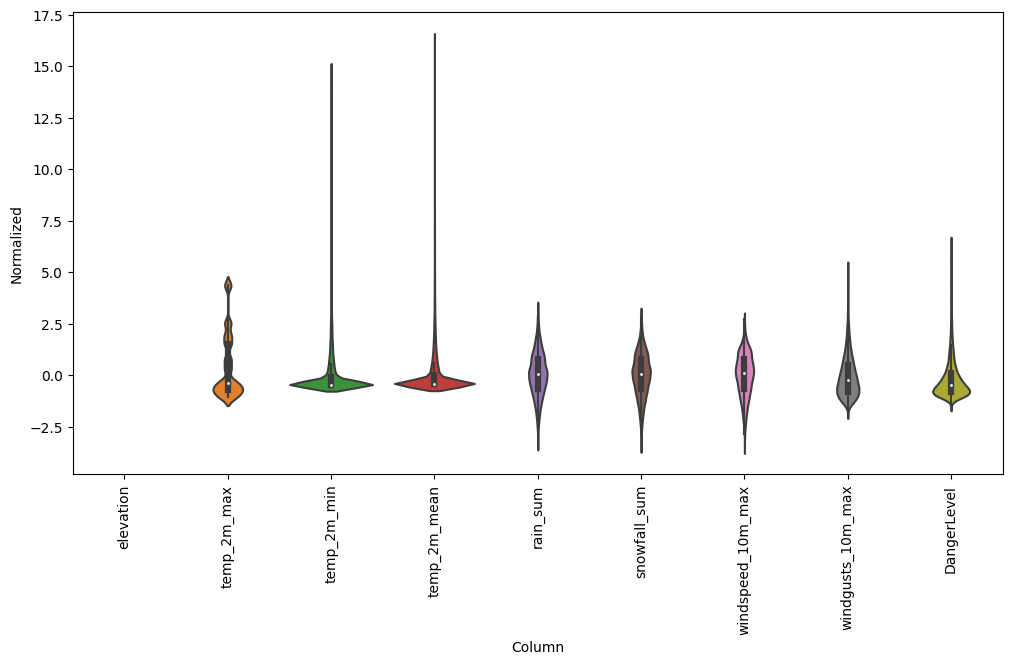

In [440]:
df_std = (total_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(total_df.keys(), rotation=90)

We do have some long tails. This could imply some incorrect values in rain_sum and snowfall_sum

In [441]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20441 entries, 2018-01-01 to 2021-12-30
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   elevation          20441 non-null  float64
 1   temp_2m_max        20441 non-null  float64
 2   temp_2m_min        20441 non-null  float64
 3   temp_2m_mean       20441 non-null  float64
 4   rain_sum           20441 non-null  float64
 5   snowfall_sum       20441 non-null  float64
 6   windspeed_10m_max  20441 non-null  float64
 7   windgusts_10m_max  20441 non-null  float64
 8   DangerLevel        20441 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.6+ MB


After looking at this, I would say there is no noticable incorrect max/min values in the dataset

## Datawindowing
Next part of the puzzle is to create datawindows. This is to facilitate the fact that we will be making predictions based on consequtive previous values

In [442]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    # Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.
    # but this split_window function also handles the label_columns so it can be used for both the single output and multi-output examples.
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels
  
  def plot(self, model=None, plot_col='DangerLevel', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [d]')

  

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
  
    ds = ds.map(self.split_window)
  
    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result


  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [443]:
import tensorflow as tf

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['DangerLevel'])


# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
Labels shape: (3, 1, 1)


## Creating a single step model
Now we have the prerequisties for creating a single step model

In [444]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['DangerLevel'])
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['DangerLevel']

In [445]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


### BaseLine
To have something to compare our models to, we need some sort of baseline. This baseline is going to predict the same output as the previous output for DangerLevel

In [446]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]
  

In [447]:
baseline = Baseline(label_index=column_indices['DangerLevel']-1)
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


ValueError: in user code:

    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filewjrv_j32.py", line 37, in tf__call
        ag__.if_stmt(ag__.ld(self).label_index is None, if_body, else_body, get_state, set_state, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_filewjrv_j32.py", line 29, in else_body
        result = ag__.ld(inputs)[:, :, ag__.ld(self).label_index]

    ValueError: Exception encountered when calling layer 'baseline_5' (type Baseline).
    
    in user code:
    
        File "/tmp/ipykernel_9366/3145205284.py", line 9, in call  *
            result = inputs[:, :, self.label_index]
    
        ValueError: slice index 9 of dimension 2 out of bounds. for '{{node baseline_5/strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=3, ellipsis_mask=0, end_mask=3, new_axis_mask=0, shrink_axis_mask=4](IteratorGetNext, baseline_5/strided_slice/stack, baseline_5/strided_slice/stack_1, baseline_5/strided_slice/stack_2)' with input shapes: [?,1,9], [3], [3], [3] and with computed input tensors: input[1] = <0 0 9>, input[2] = <0 0 10>, input[3] = <1 1 1>.
    
    
    Call arguments received by layer 'baseline_5' (type Baseline):
      • inputs=tf.Tensor(shape=(None, 1, 9), dtype=float32)


In [448]:

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['DangerLevel'])

wide_window


Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['DangerLevel']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


2023-07-22 18:03:28.425459: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: slice index 9 of dimension 2 out of bounds.


InvalidArgumentError: Exception encountered when calling layer 'baseline_5' (type Baseline).

{{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 9 of dimension 2 out of bounds. [Op:StridedSlice] name: baseline_5/strided_slice/

Call arguments received by layer 'baseline_5' (type Baseline):
  • inputs=tf.Tensor(shape=(32, 24, 9), dtype=float32)

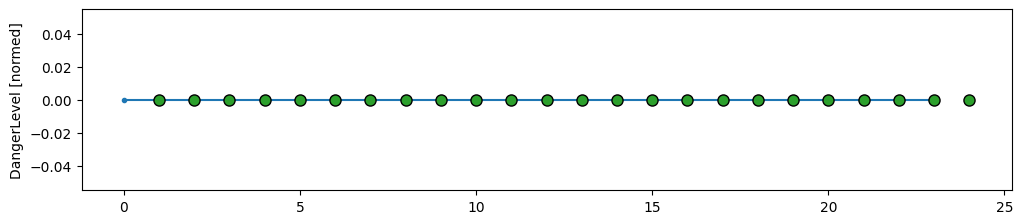

In [449]:
wide_window.plot(baseline)


Some explaination of what we are looking at (https://www.tensorflow.org/tutorials/structured_data/time_series#single_step_models):

In the above plots of three examples the single step model is run over the course of 24 hours. This deserves some explanation:

- The **blue Inputs** line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
- The **green Labels** dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
- The **orange Predictions** crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.


## A linear model

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/20


2023-07-22 17:46:25.597560: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at sparse_xent_op.cc:102 : INVALID_ARGUMENT: Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 0 0 0 1 0 0 0 1 2 3 0 3 1 0 0 2 2 0 2 3 0 0 2 0 1 3 3 0 0 1 2 2


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/home/vs/.conda/envs/boreas/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/vs/.conda/envs/boreas/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/vs/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 724, in start
      self.io_loop.start()
    File "/home/vs/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/vs/.conda/envs/boreas/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/vs/.conda/envs/boreas/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/vs/.conda/envs/boreas/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell
      await result
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "/home/vs/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/vs/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9366/3288501412.py", line 1, in <module>
      history = compile_and_fit(linear, single_step_window)
    File "/tmp/ipykernel_9366/2765705143.py", line 16, in compile_and_fit
      history = model.fit(
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 3 which is outside the valid range of [0, 1).  Label values: 0 0 0 1 0 0 0 1 2 3 0 3 1 0 0 2 2 0 2 3 0 0 2 0 1 3 3 0 0 1 2 2
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_602640]

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


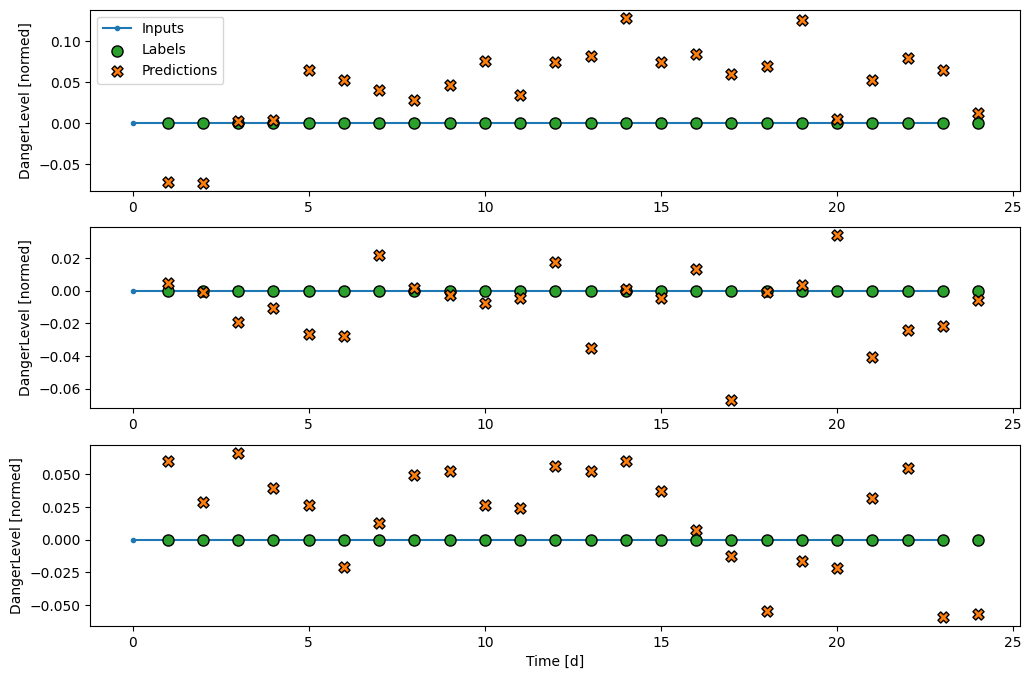

In [ ]:
wide_window.plot(linear)


Visualization of the weights of the mode

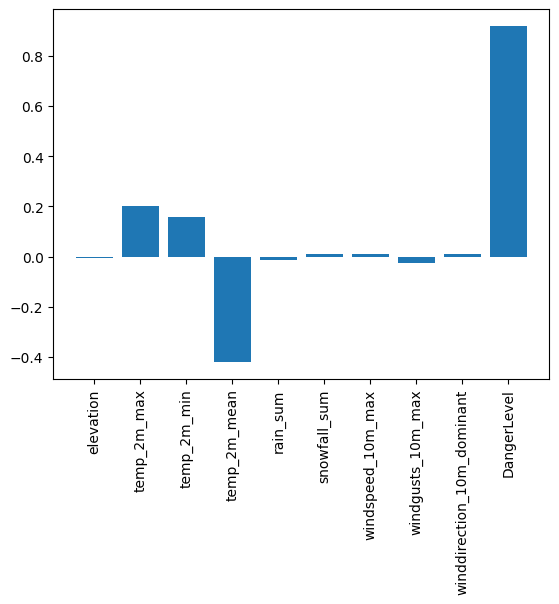

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)


## A dense model
We also would like to see if there is some substantial performance difference using a dense mode

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)


Epoch 1/20
448/448 [==============================] - 3s 5ms/step - loss: 0.1720 - mean_absolute_error: 0.2258 - val_loss: 0.1429 - val_mean_absolute_error: 0.2291
Epoch 2/20
448/448 [==============================] - 2s 5ms/step - loss: 0.1343 - mean_absolute_error: 0.1920 - val_loss: 0.1252 - val_mean_absolute_error: 0.1902
Epoch 3/20
448/448 [==============================] - 2s 4ms/step - loss: 0.1318 - mean_absolute_error: 0.1891 - val_loss: 0.1228 - val_mean_absolute_error: 0.1919
Epoch 4/20
448/448 [==============================] - 2s 5ms/step - loss: 0.1307 - mean_absolute_error: 0.1877 - val_loss: 0.1214 - val_mean_absolute_error: 0.1890
Epoch 5/20
448/448 [==============================] - 2s 5ms/step - loss: 0.1293 - mean_absolute_error: 0.1868 - val_loss: 0.1210 - val_mean_absolute_error: 0.1933
Epoch 6/20
448/448 [==============================] - 3s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1866 - val_loss: 0.1181 - val_mean_absolute_error: 0.1868
Epoch 7/20
448/4

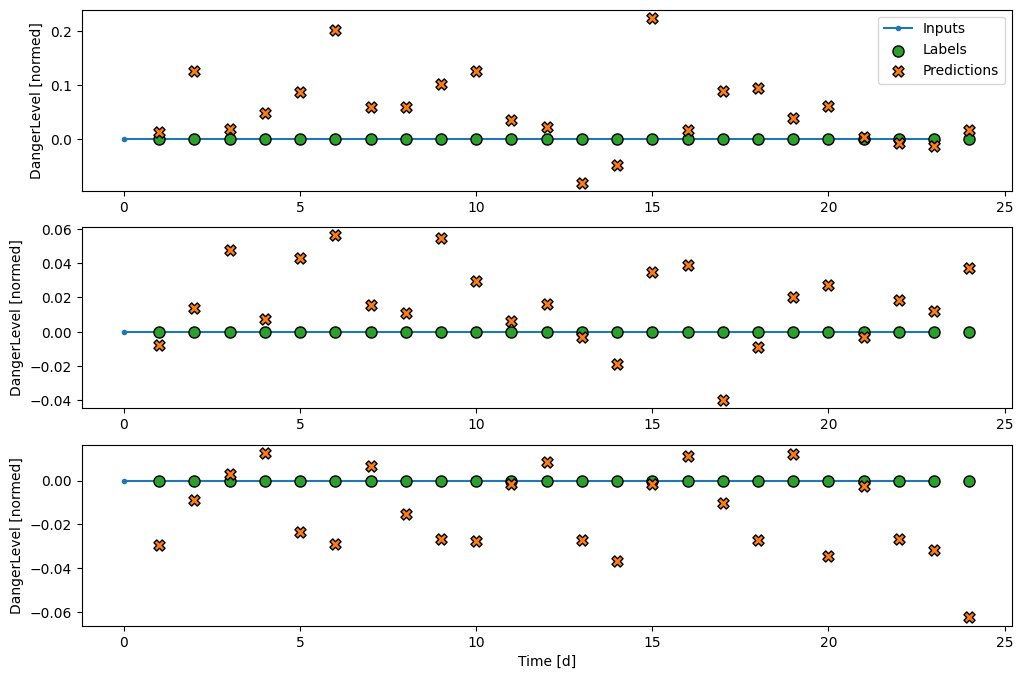

In [ ]:
wide_window.plot(dense)

## Multi-step dense
These models only look at the previous timesteps values, but can't actually see how it is changing over time. To handle this we will use a **Multi-step dense** model

At first we create a `WindowGenerator` that will produce batches of three-hour inputs and one-hour labels

**Note:** *The Window's shift parameter is relative to the end of the two windows*

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['DangerLevel'])

conv_window


Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['DangerLevel']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

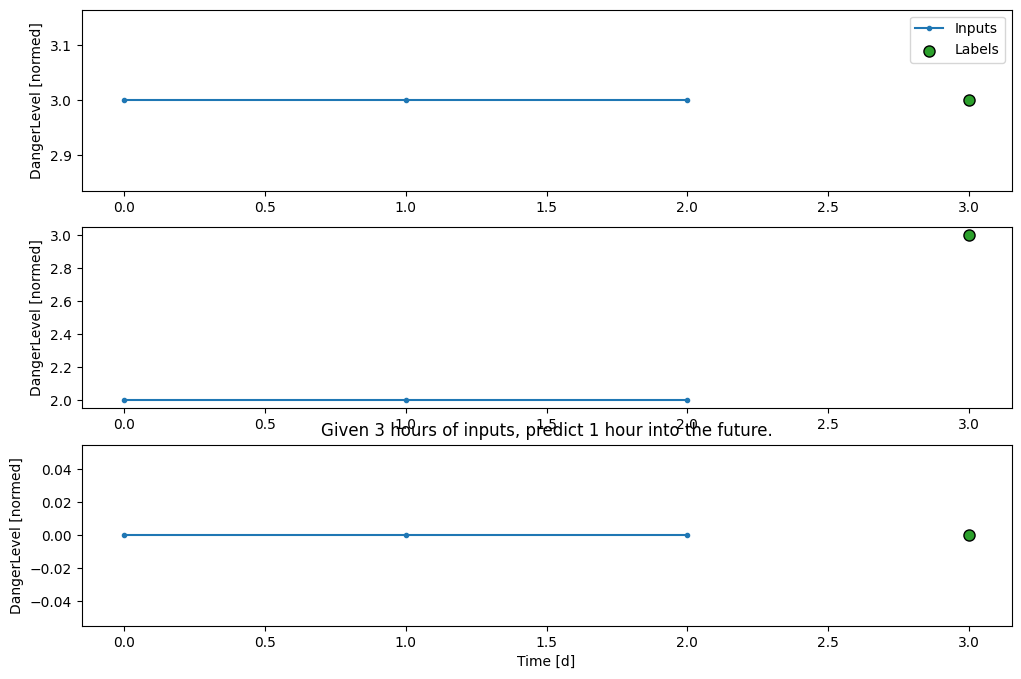

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

To train a `dense` model on a multiple-input-step window, we can add a Flatten layer as the first layer of the model:

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [ ]:
import IPython


history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


128/128 [==============================] - 0s 3ms/step - loss: 0.1339 - mean_absolute_error: 0.2234


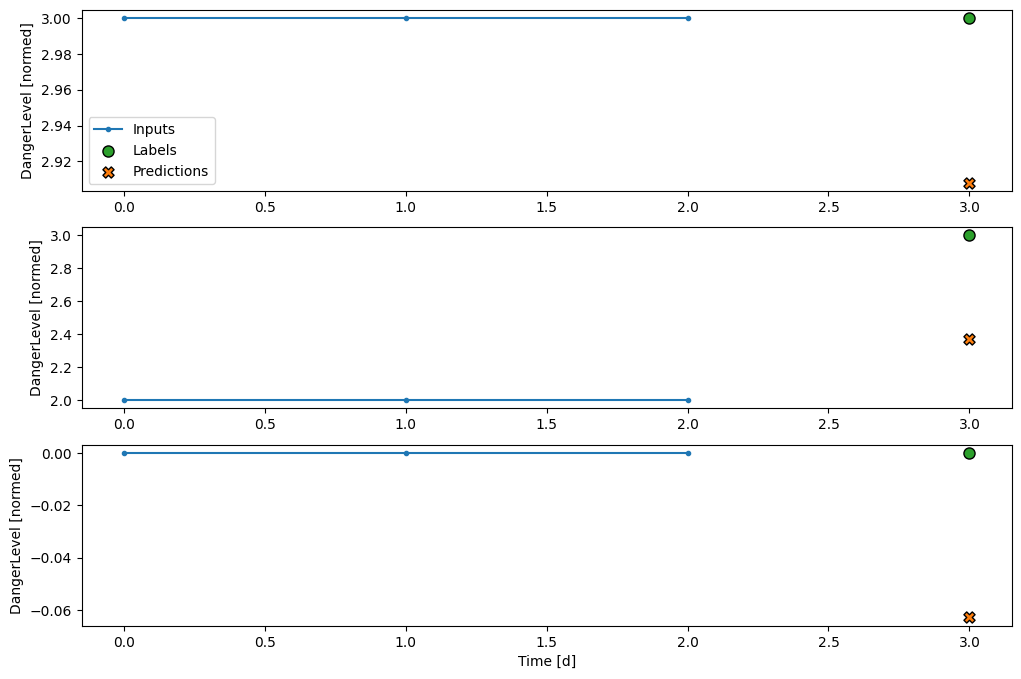

In [ ]:
conv_window.plot(multi_step_dense)

## Downsides of this approach
The resulting model can only be executed on input windows of exactly this shape

## Convolutional neural network
To handle the shape problem, we will rewrite the previous dense network into a convolutional network

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


128/128 [==============================] - 1s 4ms/step - loss: 0.1389 - mean_absolute_error: 0.2319


## Pros
A convolutional model will run onn all input shapes. If we run it on a wider input, it produces a wider output


### To make plotting work
The output is currently shorter than the input. To make plotting work, we need the labels, and prediciton to have the same length. We can do this by using the WindowgGenerator ot produce wide windows with a few extra input time steps so the labal and prediction match

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['DangerLevel'])

wide_conv_window


Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['DangerLevel']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (32, 26, 10)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


We can now plot hte model predictions on a wider window

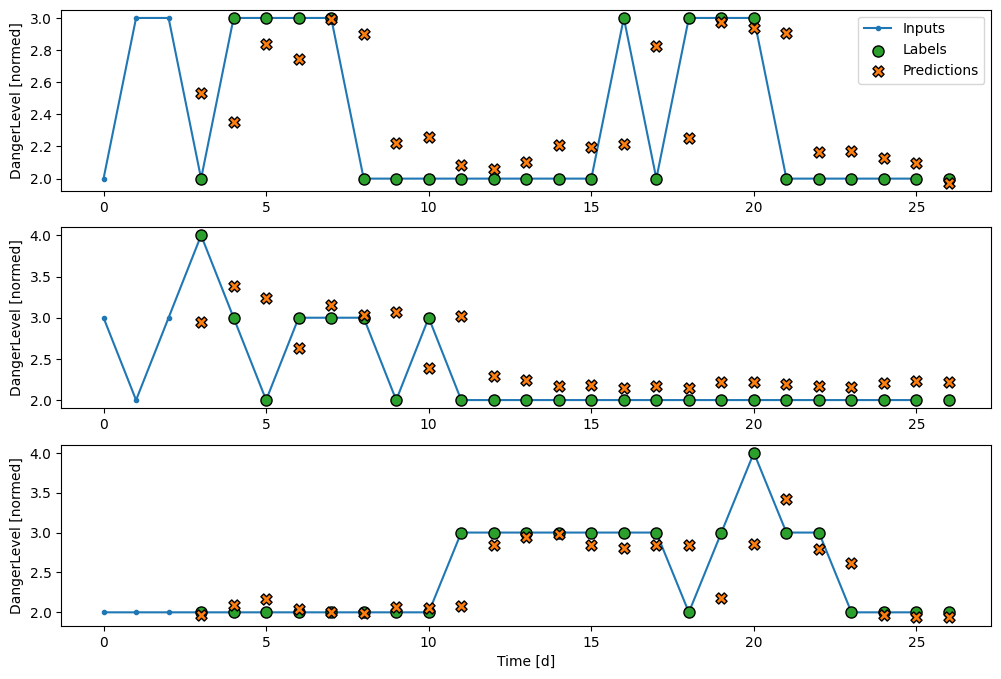

In [ ]:
wide_conv_window.plot(conv_model)


## Recurrent neural network
Is well suited for time series data. We will use an RNN later caled LSTM

In [450]:
class ArgmaxLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(ArgmaxLayer, self).__init__()

    def call(self, inputs):
        return tf.argmax(inputs, axis=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, 5]
    tf.keras.layers.Dense(units=5, activation='softmax'),
    # Custom layer to perform argmax
    ArgmaxLayer()
])


In [451]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32,)


In [455]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
    )

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']  # You can use 'accuracy' as the metric for classification
    )

    # One-hot encode the integer labels
    train_labels_one_hot = tf.keras.utils.to_categorical(window.train_labels, num_classes=5)
    val_labels_one_hot = tf.keras.utils.to_categorical(window.val_labels, num_classes=5)

    history = model.fit(
        window.train,
        train_labels_one_hot,
        epochs=MAX_EPOCHS,
        validation_data=(window.val, val_labels_one_hot),
        callbacks=[early_stopping]
    )
    return history


SyntaxError: invalid syntax. Perhaps you forgot a comma? (362666269.py, line 22)

In [454]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/20


TypeError: in user code:

    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/home/vs/.conda/envs/boreas/lib/python3.10/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    TypeError: Value passed to parameter 'features' has DataType int64 not in list of allowed values: float16, bfloat16, float32, float64


2023-07-22 17:36:33.918683: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: Index out of range using input dim 1; input has only 1 dims


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

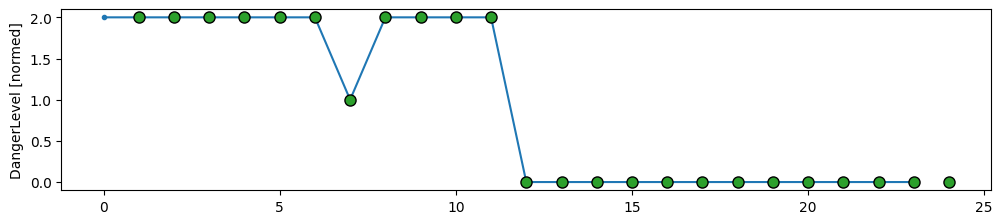

In [ ]:
wide_window.plot(lstm_model)

## Checking perfomance of the models
We will use a bar chart to compare the performance of the models

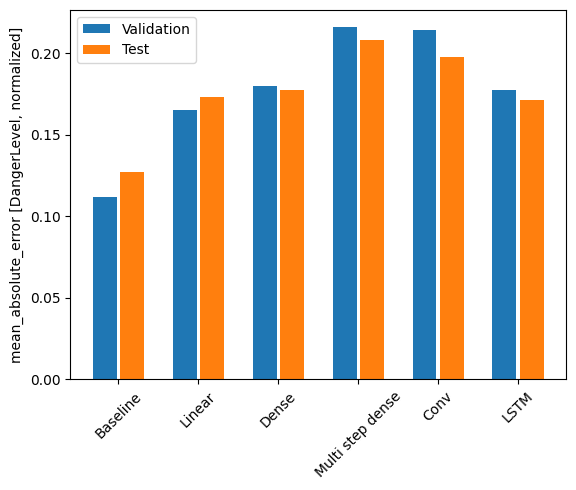

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [DangerLevel, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1272
Linear      : 0.1727
Dense       : 0.1774
Multi step dense: 0.2077
Conv        : 0.1973
LSTM        : 0.1714
